In [1]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../Data/Expendatures Teacher Inexperience Out of Cert and Core Index").dropna()

In [3]:
features = ['PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP', 'PER_OUT_CERT']
outcome = "CORE_INDEX"
list(df.columns)

['Unnamed: 0',
 'ENTITY_NAME',
 'ENTITY_CD',
 'PER_FED_STATE_LOCAL_EXP',
 'PER_TEACH_INEXP',
 'PER_OUT_CERT',
 'ABSENT_RATE',
 'INSTITUTION_ID',
 'CORE_INDEX',
 'SUBJECT',
 'SCHOOL_TYPE']

In [4]:
df.sample(10)

,Unnamed: 0,ENTITY_NAME,ENTITY_CD,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,ABSENT_RATE,INSTITUTION_ID,CORE_INDEX,SUBJECT,SCHOOL_TYPE
1484,1484,AMSTERDAM HIGH SCHOOL,270100010010,13515.0,12.0,6.0,59.2,800000049977,119.1,Combined,HS
1580,1580,NEWCOMB CENTRAL SCHOOL,151001040001,40988.0,10.0,10.0,9.4,800000051866,161.7,Combined,HS
5613,5613,RICCARDI ELEMENTARY SCHOOL,621601060001,15957.0,4.0,0.0,15.0,800000036122,147.6,Combined,EM
1326,1326,RIVERSIDE SCHOOL,280221030004,32616.0,15.0,0.0,16.4,800000049371,158.9,Combined,EM
1246,1246,GUARDINO ELEMENTARY SCHOOL,220701040001,9822.0,12.0,8.0,36.2,800000051221,127.6,Combined,EM
1179,1179,PS 98 SHORAC KAPPOCK,310600010098,26373.0,35.0,30.0,57.1,800000047009,91.8,Combined,EM
642,642,VALLEY STREAM SOUTH HIGH SCHOOL,280251070003,18327.0,7.0,0.0,5.3,800000049244,188.1,Combined,HS
4723,4723,CONCORD HIGH SCHOOL,353100011470,41142.0,15.0,10.0,96.6,800000041751,128.2,Combined,HS
2574,2574,LEEP DUAL LANGUAGE ACADEMY CS,331500861158,24657.0,30.0,76.0,26.7,800000090723,149.4,Combined,EM
5065,5065,ARKPORT CENTRAL SCHOOL,571901040004,9884.0,22.0,10.0,26.8,800000037910,134.1,Combined,EM


In [15]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df[features+[outcome]].copy(), 
                                     train_size = .9, 
                                     random_state=500, 
                                     shuffle=True
                                     )


In [16]:
# from sklearn.model_selection import KFold
# cross_val_info = KFold(n_splits=5, 
#                        shuffle=True, 
#                        random_state=500
#                        )
# cross_val_info.split(df_train)

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X=df_train[features], 
           y=df_train[outcome])

LinearRegression()

In [18]:
y_train_pred = linreg.predict(df_train[features])

In [19]:
y_train_pred

array([128.52602811, 148.47909957, 123.47115385, ..., 148.11201192,
       124.10923261, 143.8573183 ])

In [20]:
df_train[outcome]

3767    135.0
972     202.6
2547    138.7
4727    176.6
167     116.1
        ...  
3085    118.8
3879    134.5
273     136.7
4001     94.7
957      56.4
Name: CORE_INDEX, Length: 5062, dtype: float64

In [21]:
linreg.coef_

array([-0.00051836, -0.44889036, -0.18855771])

In [22]:
df[features+[outcome]].corr()

,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,CORE_INDEX
PER_FED_STATE_LOCAL_EXP,1.000000,0.185817,0.098643,-0.120101
PER_TEACH_INEXP,0.185817,1.000000,0.411877,-0.236860
PER_OUT_CERT,0.098643,0.411877,1.000000,-0.169295
CORE_INDEX,-0.120101,-0.236860,-0.169295,1.000000


In [24]:
df_train["pred"] = y_train_pred

In [37]:
## Creating a dataframe with predictions in addition to actual outcomes for a scatter plot
scatter_df_top = df_train[features+[outcome]]
scatter_df_top["Source"] = "Actual"

scatter_df_bottom = df_train[features+["pred"]]
scatter_df_bottom["Source"] = "Prediction"
scatter_df_bottom.rename({"pred": outcome}, axis="columns", inplace=True)

## Concatonating
scatter_df = pd.concat([scatter_df_top, scatter_df_bottom])


In [39]:
scatter_df.sample(10)

,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,CORE_INDEX,Source
293,18002.0,13.0,2.0,117.600000,Actual
3505,25193.0,38.0,10.0,80.700000,Actual
1193,21714.0,26.0,18.0,130.783617,Prediction
1632,31955.0,33.0,29.0,97.300000,Actual
4495,18042.0,23.0,24.0,177.200000,Actual
57,11908.0,18.0,0.0,174.900000,Actual
2595,15894.0,20.0,3.0,139.322174,Prediction
310,11833.0,20.0,6.0,88.600000,Actual
3416,30078.0,17.0,17.0,158.200000,Actual
2313,29611.0,50.0,0.0,119.310805,Prediction


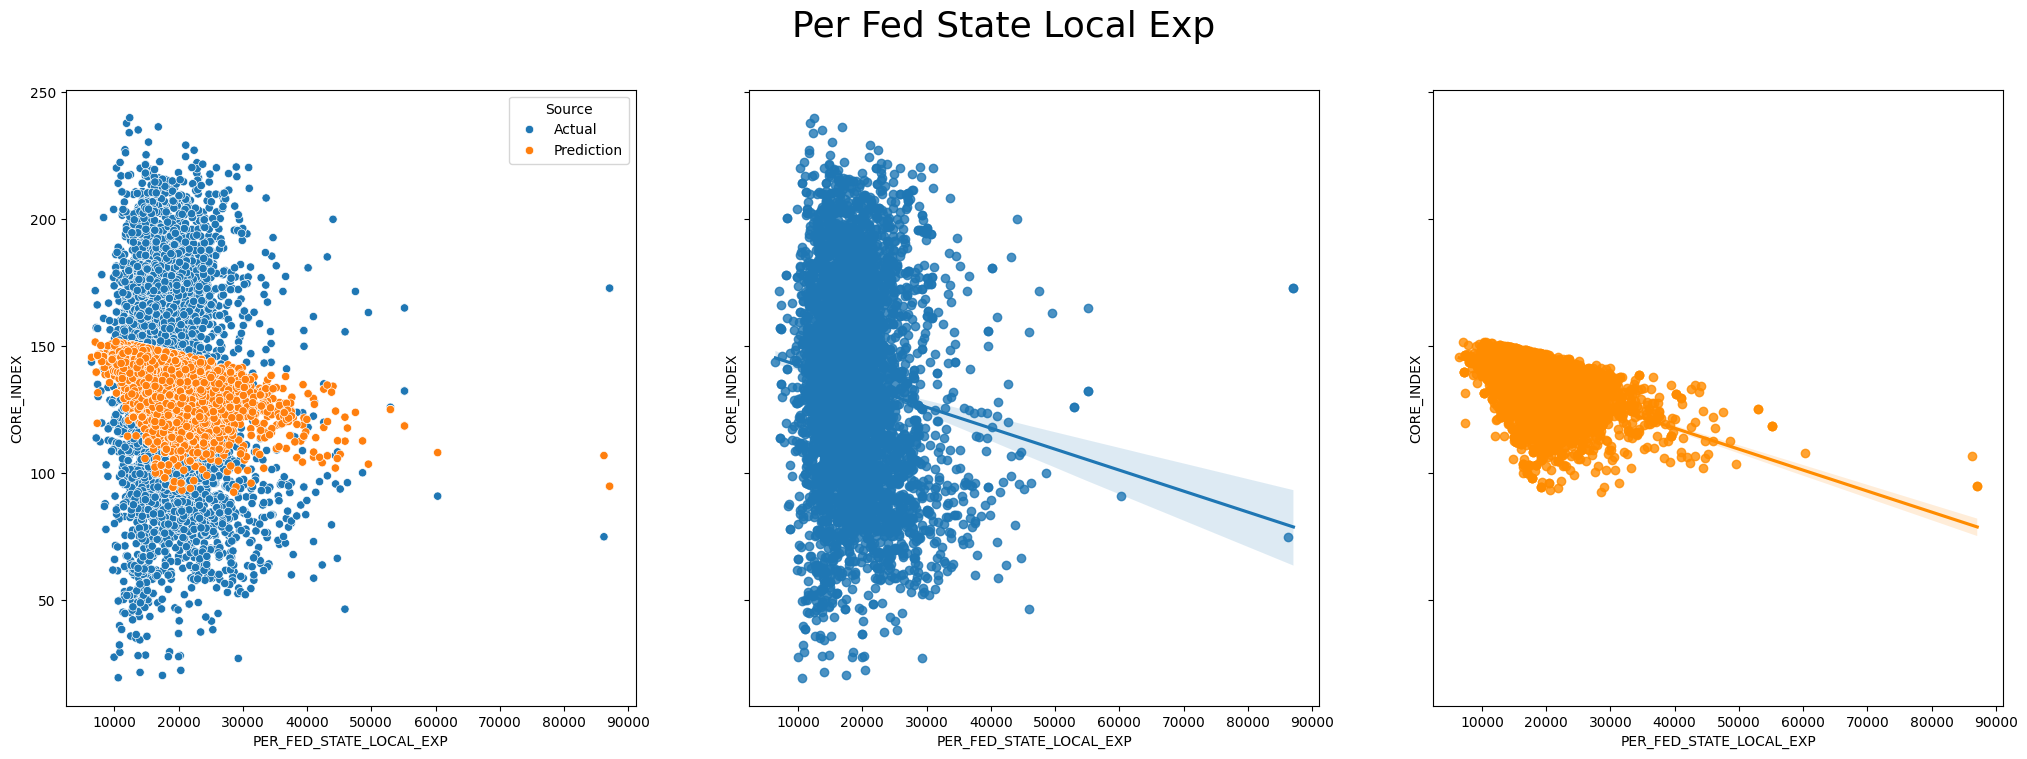

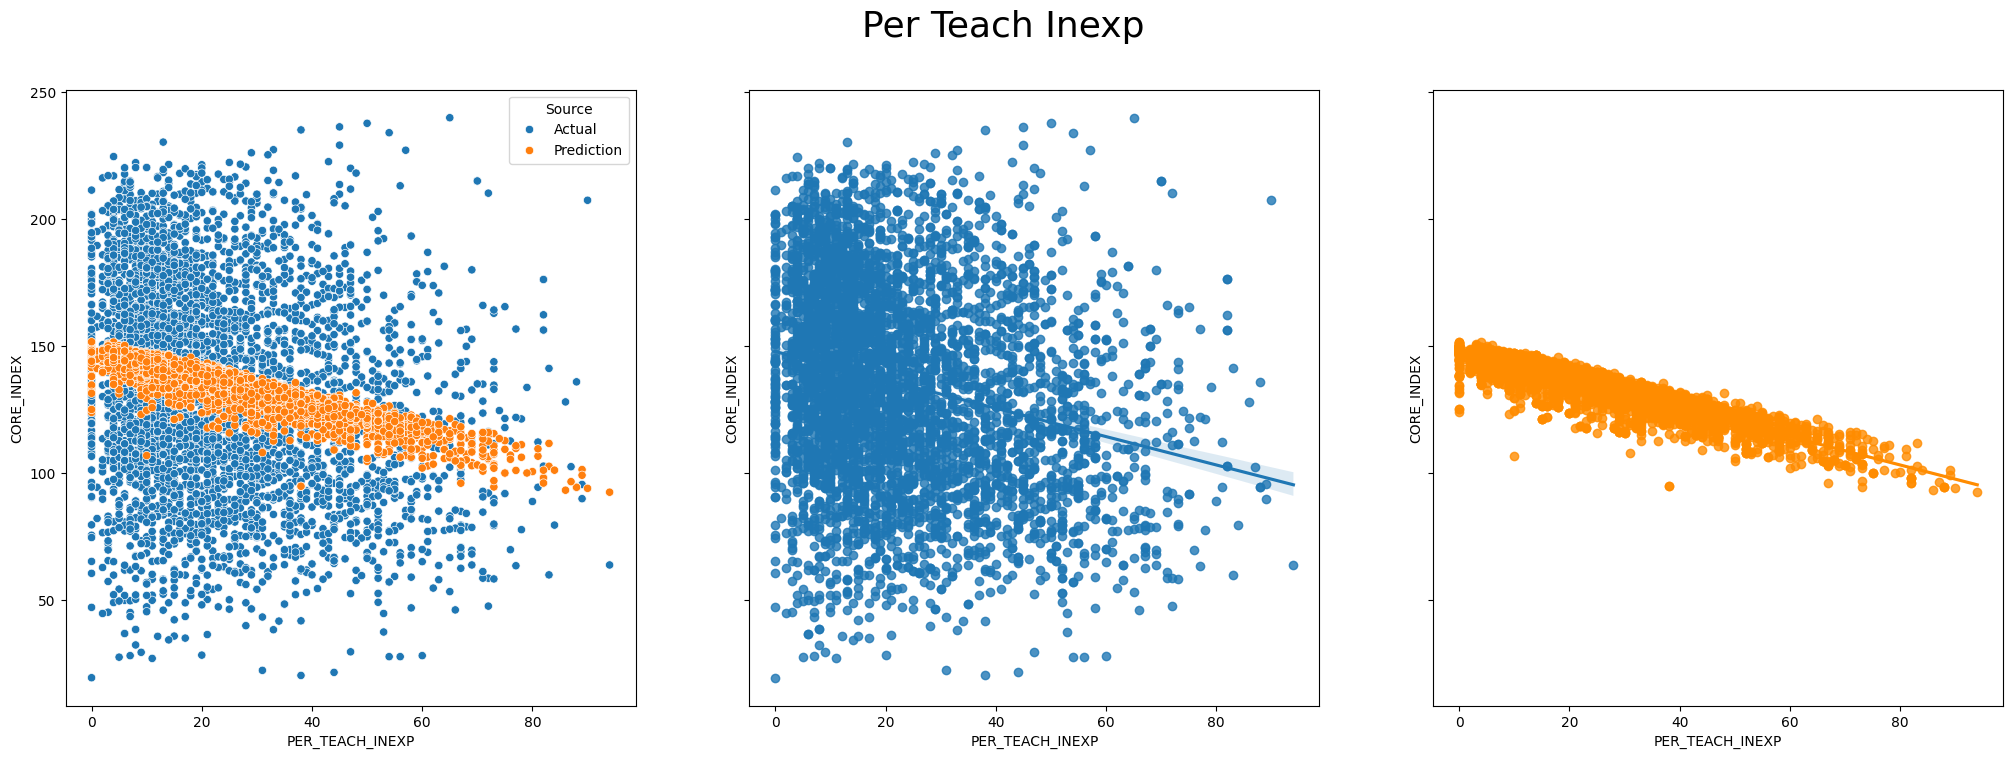

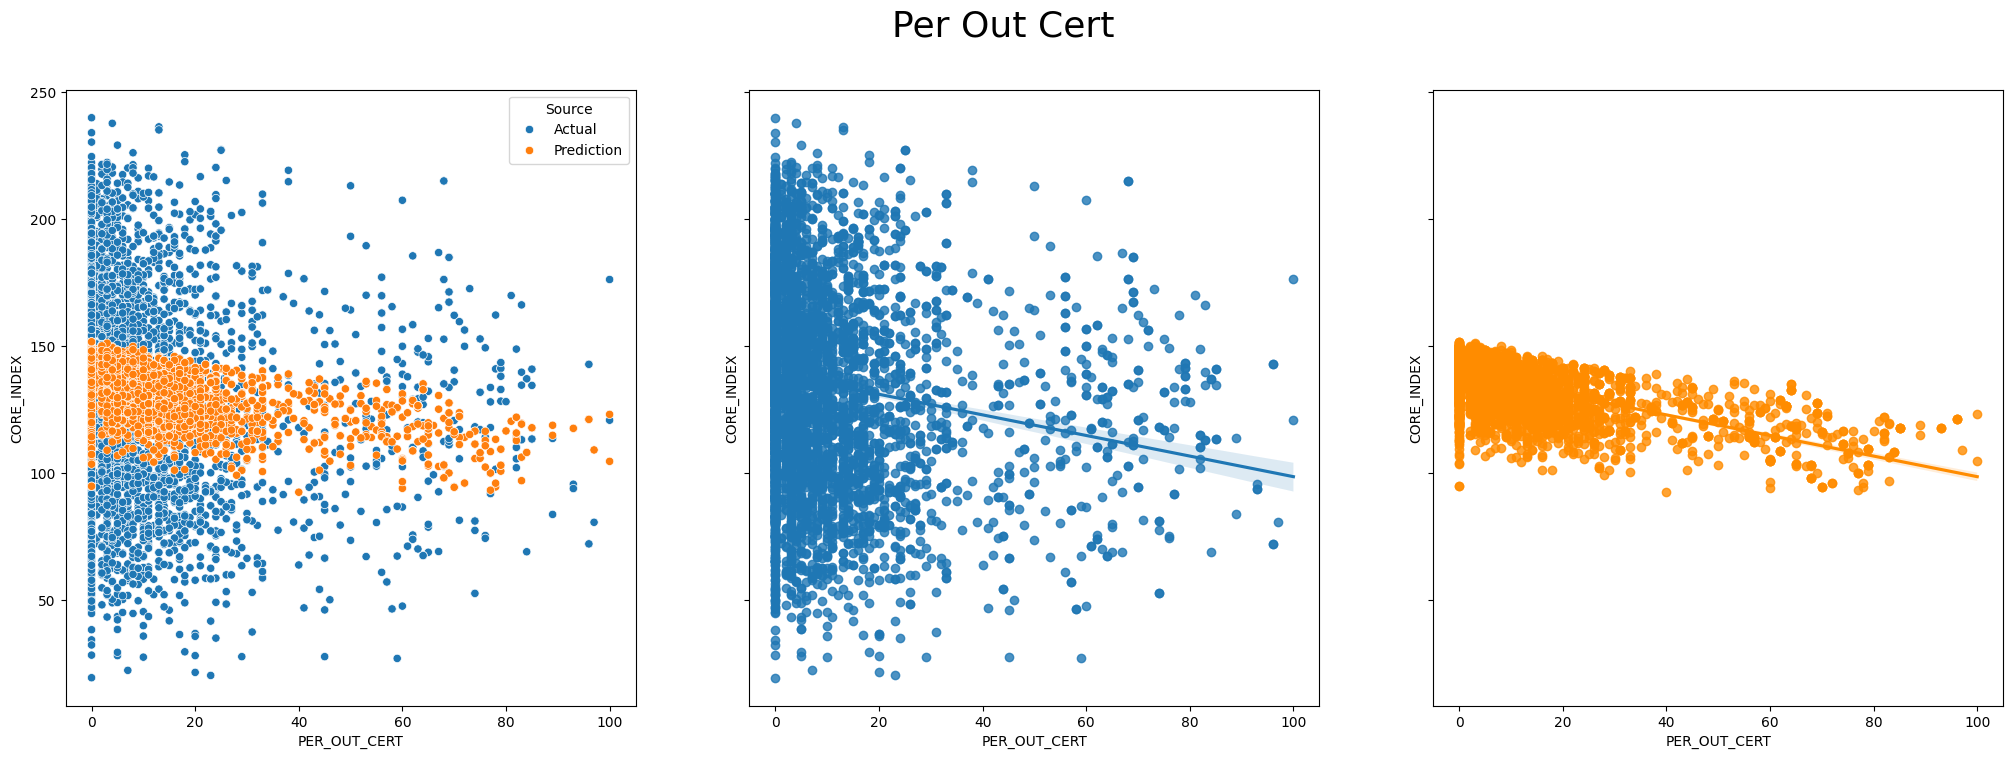

In [68]:
def clean_label(label):
    return label.replace("_", " ").title()

for feature in features:
    figure, axes = plt.subplots(1,3,  figsize=(25, 8), sharey=True)
    figure.suptitle(clean_lable(feature), fontsize=26)

    sns.scatterplot(scatter_df, x=feature, y=outcome, hue="Source", ax=axes[0])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Actual"], x=feature, y=outcome, ax=axes[1])
    sns.regplot(scatter_df.loc[scatter_df["Source"] == "Prediction"], x=feature, y=outcome, ax=axes[2], color="darkorange")
    
    plt.show()